img stats, mean: 112.284, std: 26.889, median: 120.000


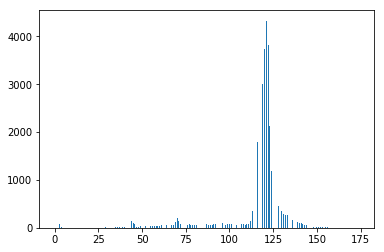

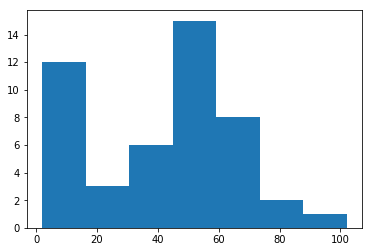

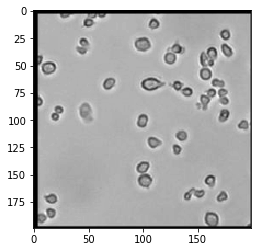

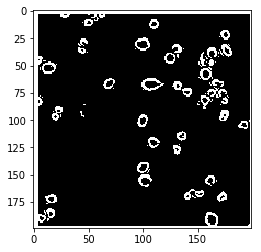

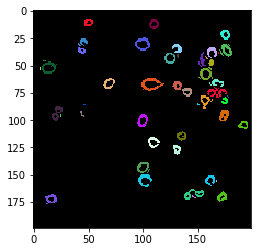

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import cv2
import queue

def getNeighbors(img, point):
    neighbors = []
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            n = (point[0] + i, point[1] + j)
            if n[0] > 0 and n[0] < img.shape[0] and n[1] > 0 and n[1] < img.shape[1]:
                neighbors.append(n)
    return neighbors

img = cv2.imread('stock_cells1.png',0).astype(np.float32)

img_flat = np.ndarray.flatten(img)
print('img stats, mean: %.3f, std: %.3f, median: %.3f' % (img_flat.mean(), img_flat.std(), np.median(img_flat)))
plt.hist(img_flat, bins='auto')
plt.show()
img_median = np.median(img_flat)

threshold = 0.25
img_threshold = np.copy(img)
img_threshold[np.abs(img - img_median) <= threshold * img_median] = 0
img_threshold[np.abs(img - img_median) > threshold * img_median] = 256

img_bfs = np.copy(img_threshold)

cell_sets = []
found_points = set()
q = queue.Queue()
for i in range(img_bfs.shape[0]):
    for j in range(img_bfs.shape[1]):
        point = (i, j)
        if img_bfs[point] != 256 or point in found_points:
            continue
            
        q.put(point)
        cell_set = set()
        cell_set.add(point)
        while not q.empty():
            curr = q.get()
            
            for neighbor in getNeighbors(img_bfs, curr):
                if neighbor not in found_points and img_bfs[neighbor] == 256:
                    found_points.add(neighbor)
                    q.put(neighbor)
                    cell_set.add(neighbor)
        cell_sets.append(cell_set)
        
img_color = np.zeros([img.shape[0], img.shape[1], 3])
i = 0
cell_stats = []
for cset in cell_sets:
    i += 1
    if len(cset) == 1:
        continue
    cell_stats.append(len(cset))
cell_stats = np.array(cell_stats)
        
good_cell_stats = cell_stats[np.abs(cell_stats - cell_stats.mean()) < cell_stats.std() * 2]
good_cells = []
plt.hist(good_cell_stats, bins='auto')
plt.show()
for i in range(len(cell_stats)):
    if np.abs(cell_stats[i] - cell_stats.mean()) < cell_stats.std() * 2:
        good_cells.append(cell_sets[i])
    
for cset in cell_sets:
    if len(cset) == 1 or len(cset) > 2000:
        continue
    color = np.random.rand(3)
    for p in cset:
        img_color[p] = color

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(img_threshold, cmap='gray')
plt.show()
plt.imshow(img_color)
plt.show()